In [1]:
import pandas as pd
df = pd.read_csv('./../../text_emotion.csv')
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [2]:
#converting 

from io import StringIO
col = ['tweet_id','sentiment', 'content']
df = df[col]
df = df[pd.notnull(df['content'])]
df = df.head(10)
df.columns = ['tweet_id','sentiment', 'content']
df['category_id'] = df['sentiment'].factorize()[0]
category_id_df = df[['sentiment', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'sentiment']].values)
df.head()

,tweet_id,sentiment,content,category_id
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,0
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,1
2,1956967696,sadness,Funeral ceremony...gloomy friday...,1
3,1956967789,enthusiasm,wants to hang out with friends SOON!,2
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,3


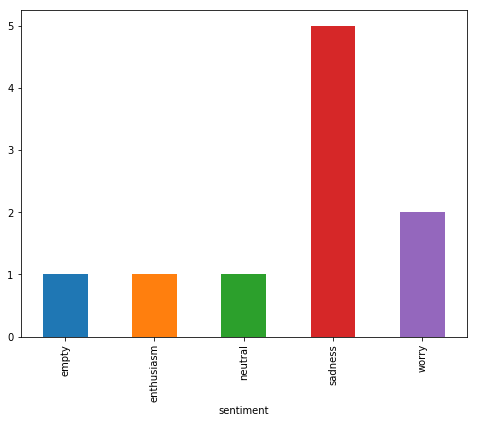

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('sentiment').content.count().plot.bar(ylim=0)
plt.show()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.content).toarray()
labels = df.category_id
features.shape

(40000, 8455)

In [5]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for sentiment, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(sentiment))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'anger':
  . Most correlated unigrams:
. filthy
. damned
  . Most correlated bigrams:
. slow today
. people work
# 'boredom':
  . Most correlated unigrams:
. sooooooo
. bored
  . Most correlated bigrams:
. really bored
. im bored
# 'empty':
  . Most correlated unigrams:
. labor
. bored
  . Most correlated bigrams:
. trying sleep
. goodnight world
# 'enthusiasm':
  . Most correlated unigrams:
. sings
. grape
  . Most correlated bigrams:
. wait start
. weekend long
# 'fun':
  . Most correlated unigrams:
. lol
. fun
  . Most correlated bigrams:
. need followers
. guys just
# 'happiness':
  . Most correlated unigrams:
. thanks
. great
  . Most correlated bigrams:
. happy star
. good morning
# 'hate':
  . Most correlated unigrams:
. sucks
. hate
  . Most correlated bigrams:
. hate rain
. ugh hate
# 'love':
  . Most correlated unigrams:
. happy
. love
  . Most correlated bigrams:
. mother day
. happy mother
# 'neutral':
  . Most correlated unigrams:
. sad
. love
  . Most correlated bigrams

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], random_state = 0)
print(X_train[0])
count_vect = CountVectorizer(stop_words='english')

X_train_counts = count_vect.fit_transform(X_train)
print(count_vect.get_feature_names())
print(count_vect)
print(type(X_train_counts))
print(X_train_counts[0].toarray())
print(X_train_counts.shape)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf)
print(X_train_tfidf.shape)
clf = MultinomialNB().fit(X_train_tfidf, y_train)
print(y_train)

@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[
['amp', 'bad', 'bc', 'bed', 'bf', 'com', 'damn', 'didn', 'djhero', 'earlier', 'freakin', 'friday', 'friend', 'friends', 'ghostridah14', 'habit', 'hang', 'headache', 'hmmm', 'http', 'im', 'kelcouch', 'know', 'layin', 'like', 'listenin', 'married', 'old', 'pinging', 'prom', 'scandalous', 'sleep', 'soon', 'sorry', 'started', 'thinking', 'tiffanylue', 'ughhhh', 'waitin', 'want', 'wants', 'www']
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0]]
(7, 4

In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
# count_vect = CountVectorizer()
X_test_counts = count_vect.transform(X_test)
print(X_test_counts.shape)
tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
print(X_test_tfidf.shape)
y_pred = clf.predict(X_test_tfidf)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

(10000, 39147)
(10000, 39147)
0.2903
0.09474536994501535
0.14438733747924284
0.11527542234916974


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
#train accuracy

y_train_pred = clf.predict(X_train_tfidf)
print(accuracy_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred, average="macro"))
print(precision_score(y_train, y_train_pred, average="macro"))
print(recall_score(y_train, y_train_pred, average="macro"))

0.4382
0.15705724924108835
0.3347070661586385
0.1784108105670551


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
from sklearn import svm
clf_svm = svm.LinearSVC().fit(X_train_tfidf, y_train)
y_pred = clf_svm.predict(X_test_tfidf)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.3215
0.17386487566561723
0.18667607470868786
0.17434969702712635


In [12]:
from sklearn import svm
clf_svc = svm.SVC()
clf_svc.fit(X_train_tfidf, y_train)
y_pred = clf_svc.predict(X_test_tfidf)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.2176
0.027494187809562313
0.01673846153846154
0.07692307692307693


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
#train accuracy

y_train_pred = clf_svc.predict(X_train_tfidf)
print(accuracy_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred, average="macro"))
print(precision_score(y_train, y_train_pred, average="macro"))
print(recall_score(y_train, y_train_pred, average="macro"))

0.2154
0.02726547765218162


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.01656923076923077
0.07692307692307693
